## Sobre o desenvolvimento

### Ciclo 

- Entendimento do problema
  
-  Entendimento do objetivo
  
-  Planejamento da solução
   
-  Obtenção dos dados
   
-  Modelagem
   
-  Construção, testes e seleção do melhor modelo
   
-  Prever os registros 

# Desenvolvimento

### 1. Entendimento do problema  

A Universidade Anahuac procura aumentar o sucesso acadêmico dos estudantes através de diferentes estratégias acadêmicas e da geração de diferentes planos de apoio social e emocional para seus estudantes. No entanto, eles acreditam que ainda podem fazer mais para garantir o sucesso acadêmico de seus alunos.

No que diz respeito à educação on-line, um dos principais desafios é evitar o abandono escolar. Para conseguir isso, é importante conhecer os estudantes e seu comportamento; entretanto, o problema se torna ainda mais complexo quando se deseja dar um acompanhamento personalizado a mais de 6.000 estudantes on-line com recursos financeiros e de tempo limitados. Hoje é essencial ajudar os estudantes que estão mais propensos a desistir através de várias estratégias que podem começar com atividades simples como agendar uma chamada telefônica ou implementar um sistema de aconselhamento mais personalizado.

Anáhuac tem muitas informações relacionadas ao desempenho e à atividade dos estudantes, o desafio é identificar as variáveis que têm maior impacto no abandono escolar e construir um bom modelo para tomar medidas rápidas e eficientes.



### 2. Entendimento do objetivo

Anáhuac tem uma enorme quantidade de dados comportamentais sobre os estudantes nos diferentes programas online. O participante deve desenvolver um algoritmo ou um modelo de Machine Learning que seja capaz de prever quais alunos passarão com sucesso no programa de pós-graduação em que estão matriculados e quais irão desistir.

### 3. Planejamento da solução

Será desenvolvido um modelo para realizar as previsões que a Universidade Anáhuac demanda.

### 4. Obtenção dos dados

In [1]:
# Libs necessárias
import pandas as pd
import numpy as np

# Libs necessárias ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelos de classificação
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

# Metricas ML
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score


/home/daniel/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Importando os datasets
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
df_base_for_training = pd.read_csv(r'ForTraining.csv')

!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
df_orden_materias = pd.read_csv(r'OrdenMaterias.csv')

!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
df_tabla_conexiones = pd.read_csv(r'TablaConexiones.csv')

!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
df_tabla_tareas = pd.read_csv(r'TablaTareas.csv')


--2022-10-07 14:55:33--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 92376 (90K) [text/plain]
Salvando em: “ForTraining.csv”

ForTraining.csv     100%[===================>]  90,21K  --.-KB/s    em 0,05s   

2022-10-07 14:55:34 (1,66 MB/s) - “ForTraining.csv” salvo [92376/92376]

--2022-10-07 14:55:34--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conectado.
A requisição HTTP foi enviada, 

### 5. Modelagem

In [3]:
# Verificando as colunas de cada dataset
print('df1:', df_base_for_training.columns)
print('df2:', df_orden_materias.columns)
print('df3:', df_tabla_conexiones.columns)
print('df4:', df_tabla_tareas.columns)

df1: Index(['studentId', 'reducido', 'ciclo', 'Graduado'], dtype='object')
df2: Index(['reducido', '2017 - 03', '2017 - 04', '2017 - 05', '2017 - 06',
       '2017 - 07', '2017 - 08', '2018 - 01', '2018 - 02', '2018 - 03',
       '2018 - 04', '2018 - 05', '2018 - 06', '2018 - 07', '2018 - 08',
       '2019 - 01', '2019 - 02', '2019 - 03', '2019 - 04', '2019 - 05',
       '2019 - 06', '2019 - 07', '2019 - 08', '2020 - 01', '2020 - 02',
       '2020 - 03', '2020 - 04', '2020 - 05', '2020 - 06'],
      dtype='object')
df3: Index(['studentId', 'ciclo', 'Dias_Conectado', 'Minutos_Promedio',
       'Minutos_Total'],
      dtype='object')
df4: Index(['studentId', 'ciclo', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas'],
      dtype='object')


In [4]:
# Unindo os dataframes
treino = df_base_for_training.merge(df_orden_materias, 
                                    how = 'inner', 
                                    on = 'reducido')
treino = treino.merge(df_tabla_conexiones, 
                      how = 'inner', 
                      on = 'studentId')
treino = treino.merge(df_tabla_tareas, 
                      how = 'inner', 
                      on = 'studentId')

In [5]:
# Como a variável target é a coluna 'Graduado', a opção escolhida foi ficar 
# apenas com os dados que possuiam correspondência com o target

In [6]:
treino['Graduado'] = treino.Graduado.map({'No':0, 'Si':1})

In [7]:
# Separando as variáveis preditoras da variável target
x = treino.drop('Graduado', axis = 1)
y = treino.Graduado

In [8]:
# Dropando colunas que não serão necessárias
x.drop(['studentId', 'ciclo_y', 'ciclo_x'], axis = 1, inplace = True)

<AxesSubplot:>

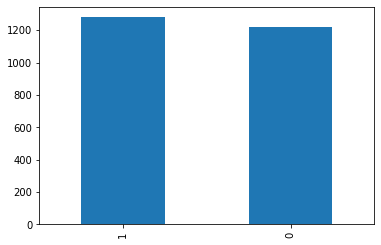

In [9]:
# Verificando o balanceamento da variável target
treino.Graduado.value_counts().plot(kind ='bar')

In [10]:
# Verificando a quantidade de ocorrências por curso
x.reducido.value_counts().tail(20)

Des. Videojuegos       4
Dere. Sanitario        4
Exp. Clin. Elec.       3
Big Data en Edu        3
Adm. Riesgos           3
Comp. Doc. S XXI       3
Oren. Edu. Fam         3
Inv. Mercados          2
Eco. Digital           2
Lit. Lat. S. XX        2
Bus. Analytics         2
Hist. Arte. Ant.       2
Precios Transf.        2
Fintech                2
Hist. Arte. Clasico    2
Transf. Globales       1
Disc. Formativa        1
Inclusion Laboral      1
Monitores Esc.         1
Neg. Dig. Y Eco. C.    1
Name: reducido, dtype: int64

In [11]:
# É possível observar que alguns cursos possuem apenas uma ocorrência, o que 
# ocasionaria um problema na divisão dos conjuntos em treino e teste, onde ao 
# aplicar um encoder, o conjunto (treino ou teste) em que esse registro único 
# estivesse iria ficar com mais colunas do que o outro. A solução será criar 
# uma cópia desses registros

In [12]:
# Copiando os registros que aparecem apenas uma vez no dataset
materias = ['Transf. Globales', 'Disc. Formativa', 'Inclusion Laboral',
            'Monitores Esc.', 'Neg. Dig. Y Eco. C.']

In [13]:
# Criando uma lista com os indexes
indexes = []
for mat in materias:
    indexes.append(x[x.reducido == mat].index[0])

In [14]:
# Copiando os valores
copia_x = []
copia_y = []
for i in indexes:
    copia_x.append(x.iloc[i].tolist())
    copia_y.append(y.iloc[i])

In [15]:
# Criando dataframes com a copia dos valores
copia_dfx = pd.DataFrame(copia_x, columns = x.columns)
copia_dfy = pd.DataFrame(copia_y)

In [16]:
# Juntando os valores
x = pd.concat([x, copia_dfx])
y = pd.concat([y, copia_dfy])

In [17]:
# Dividindo os conjuntos em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, 
                                                        test_size = 0.25,
                                                        random_state = 12, 
                                                        stratify = x['reducido'])

In [18]:
# Verificando quantas classes diferentes a coluna possui
len(x_treino.reducido.unique())

88

In [19]:
# Verificando os valores da coluna
x_treino.reducido.unique()

array(['Est. Temprana', 'Direc. Emp. Fam.', 'Lider. Inst. Edu.',
       'Hab. Geren.', 'Crianza Hijos', 'Inn. Negocios', 'Intro. Fin',
       'Coaching de Vida', 'Psicoped. Escolar', 'Educacion',
       'Bien. Salud y Calidad', 'Edu. Preescolar', 'Comp. Dig. Docentes',
       'Prof. Deportiva.', 'Hist. Arte. Clasico', 'Inn. Tec. Edu.',
       'Direc. Proy.', 'Eco. Digital', 'Monitores Esc.',
       'E. Lectoescritura', 'Estrategia Tal. Hum.', 'Big Data',
       'Inc. Edu.', 'Gest. Tal.', 'Gest. Esc.', 'Alim. Y Nut. Salud',
       'E-Commerce', 'Admon Fin.', 'Mercadotecnia',
       'Programacion de Apps', 'Adm. Salud', 'Direc. Estrat. Neg',
       'Comp. Directivas', 'Mkt. Digital', 'Ventas Estrat.',
       'Neuromarketing', 'Adm. Emp.', 'Planeacion Estrat.',
       'Diagn. Psicoped.', 'Inn. Diseno Edu.', 'Des. Cap. Hum.',
       'Estrat. Comercial', 'Des. Neg. y Empren.', 'Mkt. Farmaceutico',
       'Fin. Corp. Avan.', 'Hist. Arte. Medieval', 'Calidad Educativa',
       'Desarrollo Mot

In [20]:
# É possível notar que os valores não seguem uma ordem, eles são nominais

In [21]:
# Fazendo uma alteração nos valores da coluna ciclo
novos_valores = []
for i in x_treino.ciclo:
    i = i.replace(' - ', '/')
    novos_valores.append(i)
x_treino['ciclo'] = novos_valores

novos_valores = []
for i in x_teste.ciclo:
    i = i.replace(' - ', '/')
    novos_valores.append(i)
x_teste['ciclo'] = novos_valores

In [22]:
# Mudando o tipo de variável da coluna
x_treino['ciclo'] = pd.to_datetime(x_treino['ciclo'])
x_teste['ciclo'] = pd.to_datetime(x_teste['ciclo'])

In [23]:
# Criando uma nova feature 
x_treino['mes'] = x_treino.ciclo.dt.month
x_teste['mes'] = x_teste.ciclo.dt.month

In [24]:
# Criando uma nova feature
x_treino['ano'] = x_treino.ciclo.dt.year
x_teste['ano'] = x_teste.ciclo.dt.year

In [25]:
# Dropando uma coluna que não será mais necessária
x_treino.drop('ciclo', axis = 1, inplace = True)
x_teste.drop('ciclo', axis = 1, inplace = True)

In [26]:
# Buscando as colunas que irão ser alteradas
colunas = x_treino.loc[:, '2017 - 03':'2020 - 06'].columns

# Criando a função que será aplicada
func = lambda x: 0 if x == 'Sin clase' else 1

# Alterando os valores dos conjuntos de treino e teste
for col in colunas:
    x_treino[col] = x_treino.loc[:, col].apply(func)
    x_teste[col] = x_teste.loc[:, col].apply(func)

### 6. Construção, testes e seleção do melhor modelo

In [27]:
# Buscando as colunas numéricas
numeral = x_treino.select_dtypes(float).columns.tolist()
nominal = ['reducido']

In [28]:
# Instanciando os transformadores
sc = StandardScaler()
ohe = OneHotEncoder(drop = 'first')
pf = PolynomialFeatures()

In [29]:
# Criando o transformador
transformer = ColumnTransformer(transformers = [('transf', pf, numeral),
                                                ('scaler', sc, numeral),
                                                ('encoder', ohe, nominal)])

In [50]:
# Instanciando os modelos
rf = RandomForestClassifier()
ext = ExtraTreesClassifier()
xgbc = XGBClassifier()
lgbmc = LGBMClassifier()
catbc = CatBoostClassifier()
lr = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
bnb = BernoulliNB()

# Criando uma lista com os modelos
modelos = [rf, ext, xgbc, lgbmc, catbc, lr, svc, knn, bnb]

In [51]:
# Testando os modelos e obtendo os scores
scores = {}
for model in modelos:
    passos = [('transformer', transformer),
              ('modelo', model)]
    pipe = Pipeline(passos)
    pipe.fit(x_treino, y_treino.values.ravel())
    score = f1_score(y_treino, pipe.predict(x_treino), pos_label = 0)
    scores[str(model)] = score

/home/daniel/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.013483
0:	learn: 0.6837159	total: 4.54ms	remaining: 4.53s
1:	learn: 0.6744980	total: 8.3ms	remaining: 4.14s
2:	learn: 0.6674317	total: 11.6ms	remaining: 3.87s
3:	learn: 0.6589939	total: 14.3ms	remaining: 3.56s
4:	learn: 0.6512390	total: 16.9ms	remaining: 3.36s
5:	learn: 0.6434438	total: 22.1ms	remaining: 3.66s
6:	learn: 0.6352077	total: 25.5ms	remaining: 3.62s
7:	learn: 0.6276829	total: 28.7ms	remaining: 3.56s
8:	learn: 0.6209138	total: 31.1ms	remaining: 3.43s
9:	learn: 0.6136421	total: 36.2ms	remaining: 3.59s
10:	learn: 0.6071405	total: 39.4ms	remaining: 3.55s
11:	learn: 0.6003689	total: 42.8ms	remaining: 3.52s
12:	learn: 0.5940702	total: 45.6ms	remain

/home/daniel/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# Verificando o resultado do teinamento
scores

{'RandomForestClassifier()': 1.0,
 'ExtraTreesClassifier()': 1.0,
 "XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,\n              gamma=0, gpu_id=-1, importance_type=None,\n              interaction_constraints='', learning_rate=0.300000012,\n              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,\n              monotone_constraints='()', n_estimators=100, n_jobs=8,\n              num_parallel_tree=1, predictor='auto', random_state=0,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)": 1.0,
 'LGBMClassifier()': 0.9988974641675854,
 '<catboost.core.CatBoostClassifier object at 0x7f6a5c5a1b80>': 0.9159519725557461,
 'LogisticRegression()': 0.7383120825743776,
 'SVC()': 0.6816395283548567,
 'KNeighborsClassifier()': 0.7926054303870596,
 'BernoulliNB()': 0.702333523050

In [ ]:
# Os modelos com melhor score são baseados em árvore de decisão, e mesmo com o 
# score de 1.0, indicando que 'decoraram' os dados, ainda é possível 
# aproveita-los, basta realizar o pruding, fazendo com que ele perca variância 
# e se torne mais generalizável. Para isso, serão usados parâmetros específicos
# do classificador escolhido.

In [53]:
# Criando o pipeline 
passos = [('transformer', transformer),
          ('modelo', XGBClassifier(max_depth = 2, gamma = 0.1))]

pipe = Pipeline(passos)

In [54]:
# Treinando o modelo
pipe.fit(x_treino, y_treino.values.ravel())

/home/daniel/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('transf',
                                                  PolynomialFeatures(),
                                                  ['Dias_Conectado',
                                                   'Minutos_Promedio',
                                                   'Minutos_Total',
                                                   'Calificacion_Promedio',
                                                   'Tareas_Puntuales',
                                                   'Tareas_No_Entregadas',
                                                   'Tareas_Retrasadas',
                                                   'Total_Tareas']),
                                                 ('scaler', StandardScaler(),
                                                  ['Dias_Conectado',
                                                   'Minutos_Promedio',
                                                   'Minutos_Total',
                                                   'Calificacion_Promed...
                               gamma=0.1, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=2, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [55]:
# Verificando os scores do treino
print(f1_score(y_treino, pipe.predict(x_treino), pos_label = 0), '\n')
print(classification_report(y_treino, pipe.predict(x_treino)), '\n')
print(confusion_matrix(y_treino, pipe.predict(x_treino)), '\n')
print(roc_auc_score(y_treino, pipe.predict(x_treino)))


0.8730614589316484 

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       908
           1       0.86      0.92      0.89       970

    accuracy                           0.88      1878
   macro avg       0.89      0.88      0.88      1878
weighted avg       0.88      0.88      0.88      1878
 

[[760 148]
 [ 73 897]] 

0.8808733366637904


In [36]:
# Verificando os scores do teste
print(f1_score(y_teste, pipe.predict(x_teste), pos_label = 0), '\n')
print(classification_report(y_teste, pipe.predict(x_teste)), '\n')
print(confusion_matrix(y_teste, pipe.predict(x_teste)), '\n')
print(roc_auc_score(y_teste, pipe.predict(x_teste)))

0.803305785123967 

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       314
           1       0.79      0.85      0.82       313

    accuracy                           0.81       627
   macro avg       0.81      0.81      0.81       627
weighted avg       0.81      0.81      0.81       627
 

[[243  71]
 [ 48 265]] 

0.8102653588653059


### 7. Prever os registros 

In [37]:
# Obtendo os dados para predizer
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
df_to_be_predicted = pd.read_csv(r'ToBePredicted.csv')

--2022-10-07 14:55:47--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 33892 (33K) [text/plain]
Salvando em: “ToBePredicted.csv”

ToBePredicted.csv   100%[===================>]  33,10K  --.-KB/s    em 0,008s  

2022-10-07 14:55:47 (3,81 MB/s) - “ToBePredicted.csv” salvo [33892/33892]



In [38]:
# Unindo os dataframes
df_to_pred = df_to_be_predicted.merge(df_orden_materias, 
                                      how = 'inner', 
                                      on = 'reducido')
df_to_pred = df_to_pred.merge(df_tabla_conexiones, 
                              how = 'inner', 
                              on = 'studentId')
df_to_pred = df_to_pred.merge(df_tabla_tareas, 
                              how = 'inner', 
                              on = 'studentId')

In [39]:
# Dropando colunas que não serão necessárias
df_to_pred.drop(['studentId', 'ciclo_y', 'ciclo_x'], axis = 1, inplace = True)

In [40]:
# Fazendo uma alteração nos valores da coluna ciclo
novos_valores = []
for i in df_to_pred.ciclo:
    i = i.replace(' - ', '/')
    novos_valores.append(i)
df_to_pred['ciclo'] = novos_valores

In [41]:
# Mudando o tipo de variável da coluna
df_to_pred['ciclo'] = pd.to_datetime(df_to_pred['ciclo'])

In [42]:
# Criando uma nova feature 
df_to_pred['mes'] = df_to_pred.ciclo.dt.month

In [43]:
# Criando uma nova feature
df_to_pred['ano'] = df_to_pred.ciclo.dt.year

In [44]:
# Dropando uma coluna que não será mais necessária
df_to_pred.drop('ciclo', axis = 1, inplace = True)

In [45]:
# Buscando as colunas que irão ser alteradas
colunas = df_to_pred.loc[:, '2017 - 03':'2020 - 06'].columns

# Criando a função que será aplicada
func = lambda x: 0 if x == 'Sin clase' else 1

# Alterando os valores dos conjuntos de treino e teste
for col in colunas:
    df_to_pred[col] = df_to_pred.loc[:, col].apply(func)

In [46]:
# Prevendo os valores 
predicoes = pipe.predict(df_to_pred)

In [47]:
# Convertendo os valores ao original
predicoes = list(map(lambda x: 'No' if x == 0 else 'Si', predicoes))

In [48]:
# Gerando um arquivo csv com os resultados
pd.DataFrame(predicoes).to_csv('previsoes')